# Introduction
## Abstract
In the following report, we will attempted to identify whether a relationship exists between the U.S. economic environment and the performance of the North American movie industry. Specifically, we will looked at the following questions:

## How does the economy affect the overall number of tickets sold?
How does the economy affect the performance of different genres? Through a wide array of analysis, we have determined that the relationship between the economy and overall number of tickets sold is extremely strong. However, when take a closer look at the relationship between economic performance and genre market share, we found that most genres maintain a small but consistent market share, but the adventure and drama genre are strongly affected. The relationship is as follows...one rises, one falls, linear relatinship, etc.
Background
(literally none of this is right, need to do research ^.^) In recent years, the movie industry is becoming more globalized and finding the need to balance the sanctity of box-office premieres with the streaming demands. Ticket sales are dropping and movie theaters are becoming experiential instead of the primary medium for movie-goers. Moreover, market volatility is increasing, with three economic downturns in the past fifty years with only a few in the past hundered. By identifying how economic trends impact movie ticket sales and how economic performance affects movie genre preferences, the box-office movie industry can get a better pulse on consumer economic response. Specifically, companies can figure out whether they should releasing more box-office movies, and whether they should target a specific genre.

## Composition
### Dataset Overview

To do so, we have compiled a dataset that contains the following information:

Attributes: Total box office tickets sold in North America, market share based on genre in North America, annual % change in U.S. GDP, and change in annual % change of national U.S. income in chained dollars
Observations: The data spans the years 1995-2018
We specifically measure genres based on market share to remove any variation atrributable to change in movie tickets sold. Additionally we use GDP and income because GDP enables us to measure the health of the United States while income measures the economic health of individual consumers. We use chained dollars for income to account for inflation.

This data is not designed to represent a larger population or to be extrapolated geographically. We are specifically looking at how the preformance of the U.S. market impacts the performance of the North American box-office movie industry.

### Dataset Sources

This dataset has two key components: movie information and economic information.

Movie information was scraped from the Numbers, a data analytics organization with the following mission: 'The Numbers was officially launched on October 17th, 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies.' The data collection was funded by Nash Information Services, a movide industry consulting service.

Economic data from the U.S. Bureau of Economic Analysis (BEA) in the form of a csv. The government keeps track major economic indicators to aid them in making economic decisions. This data was funded by the U.S. government.

People were not involved in any of the data collection.

### Data Preparation and Preprocessing

Ticket sales was recorded by ticket sales. Market share by genre was found by first sorting movies based on eleven key genres. From there, the number of tickets sold for movies under a specific genre during a specific year were summed and divided by the total number of tickets sold. Government data is collected and analyzed the the BEA.

Additionally, in our creation of the data, we did some processing. First, we selected the data range 1995-2018 because the Numbers data began at 1995 and we wanted to ensure that the annual data was in its entirety and felt that 2019 data might not be as accurate. A

We also created an "Other" genre category, for genres such as Westerns, which have a market share of less than 1%. We decided to do this because if a genre captures less than one percent in the market, then any changes in them could be due to noise. For example, maybe a specific movie becomes really famous and draws attention to the genre. This does not mean that economic changes impacted consumer preferences. Moreover, since the market share is so low, any variation is magnified in proprtion to the data.

Potential Influences on the Data

Two key sources could impact the data. First, illegal movie streaming or "pirating" movies is a major concern in the box-office industry. Therefore, number of tickets purchased does not necessarily represent number of views. Secondly, movies are sorted based on genre, but a movie could fall under two different catergories, especially a popular one. This may cause a skew in favor of one genre over the other.

# Data Analytics

In [32]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

In [33]:
data=pd.read_csv('data.csv', index_col=0)

In [34]:
col = data.columns[:len(data.columns)-3]
income = data.columns[-1]
headings=data.columns[:]
summary = data.describe()

In [35]:
stats = pd.DataFrame()
for c in headings:
    stats[c]=[summary[c][5],summary[c][1],summary[c][2]]
stats.index = ['Med','Mean', 'StDev']

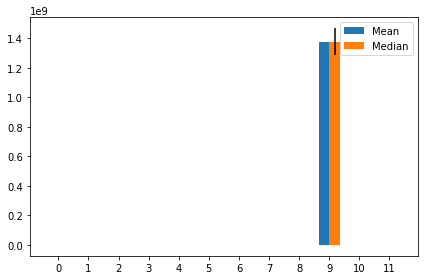

In [82]:
means =tuple(stats.loc['Mean'])
stdev = tuple(stats.loc['StDev'])
med = tuple(stats.loc['Med'])

ind = np.arange(12)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means, .35, label='Mean')
rects2 = ax.bar(ind + width/2, med, width, yerr=stdev, label='Median')



#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
#ax.set_xticklabels(['Adv', 'Action', 'Drama','Com', 'Thril', 'Horr', 'RCom','Mus', 'Other', 'Ttl', 'GDP', 'Inc'])
ax.legend()



fig.tight_layout()


plt.show()

# Number Of Tickets Sold vs. GDP
## How does the GDP impact the popularity of movie genres?
### Visual Display of Data

The following plot shows total movie ticket sales per year over our timeframe of interest (1995 to 2018).

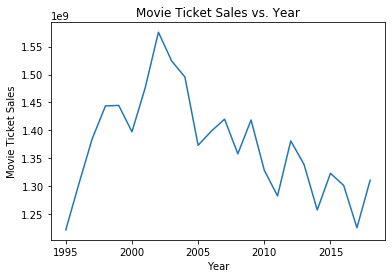

In [66]:
#Graph of Ticket Sales 

tickets_raw = pd.DataFrame(data["Total Tickets"])
tickets = np.zeros(24)
x = 0
for value in tickets_raw.iterrows():
    tickets[x] = tickets_raw.iloc(0)[x]
    x+=1

plt.plot(range(1995,2019),tickets)
plt.xlabel("Year")
plt.ylabel("Movie Ticket Sales")
plt.title("Movie Ticket Sales vs. Year")
plt.show()

The following plot shows the percent growth in the United States GDP per year over our timeframe of interest (1995 to 2018).

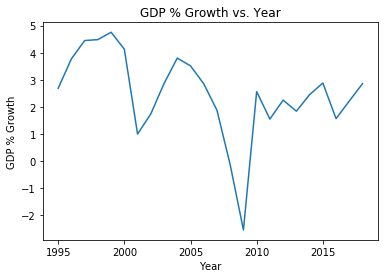

In [67]:
#Graph of GDP

gdp = data["GDP % Growth"]
g = np.zeros(24)
count = 0
for x in gdp:
    g[count] = x
    count+=1

plt.plot(range(1995,2019),g)
plt.xlabel('Year')
plt.ylabel('GDP % Growth')
plt.title("GDP % Growth vs. Year")
plt.show()

### Model of Relationships

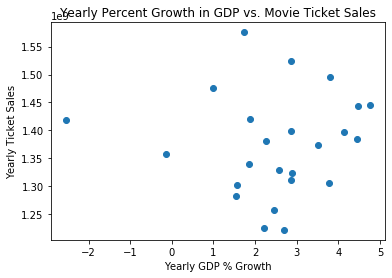

In [68]:
model = LinearRegression().fit(data[["GDP % Growth"]], data[["Total Tickets"]])

cor = model.coef_[0]
intercept=model.intercept_

plt.scatter(data[["GDP % Growth"]], data[["Total Tickets"]])
plt.ylabel("Yearly Ticket Sales")
plt.xlabel("Yearly GDP % Growth")
plt.title("Yearly Percent Growth in GDP vs. Movie Ticket Sales")
plt.show()

### Finding r<sup>2</sup>

In [69]:
rsq = model.score(data[["GDP % Growth"]],data["Total Tickets"])
print("R^2 Value of Correlation: ", rsq)

R^2 Value of Correlation:  0.001367271152202587


The low r<sup>2</sup> value indicatest that there is not a high correlation between the GDP changes and the number of movie tickets sold.

### Evaluation Of Significance

In [70]:
spearman = spearmanr(data["GDP % Growth"], data[["Total Tickets"]]).correlation 
print("Spearman Correlation Value: ",spearman)

Spearman Correlation Value:  0.17043478260869566


# Income and Tickets Sold

How does the economy impact the popularity of movie generes?

### Visual display of Data
The following plot shows the percent change in income in each year. This scatterplot allows us to see the trend of income over our time frame of interest (1995 to 2018).

Mean Percent Change in Income:  2.8333333333333335
Standard Deviation of Percent Change in Income:  1.5186799823823611


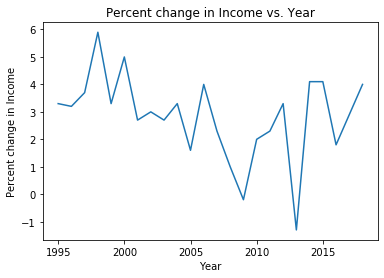

In [37]:
income_raw = pd.DataFrame(data["% Income Annual Change, Chained Dollars"])
income= np.zeros(24)
x = 0
for value in income_raw.iterrows():
    income[x] = income_raw.iloc(0)[x]
    x+=1
    
print("Mean Percent Change in Income: ", income.mean())
print("Standard Deviation of Percent Change in Income: ", income.std())

plt.plot(range(1995,2019),income)
plt.xlabel("Year")
plt.ylabel("Percent change in Income")
plt.title("Percent change in Income vs. Year")
plt.show()

The following plot shows total movie ticket sales per year over our timeframe of interest (1995 to 2018).

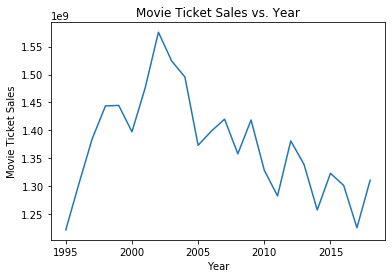

In [38]:
tickets_raw = pd.DataFrame(data["Total Tickets"])
tickets = np.zeros(24)
x = 0
for value in tickets_raw.iterrows():
    tickets[x] = tickets_raw.iloc(0)[x]
    x+=1

plt.plot(range(1995,2019),tickets)
plt.xlabel("Year")
plt.ylabel("Movie Ticket Sales")
plt.title("Movie Ticket Sales vs. Year")
plt.show()

### Model of relationships

In [39]:

model = LinearRegression().fit(data[["% Income Annual Change, Chained Dollars"]], data[["Total Tickets"]])

cor = model.coef_[0]
intercept=model.intercept_

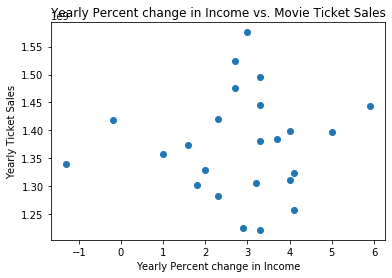

In [40]:
plt.scatter(data[["% Income Annual Change, Chained Dollars"]], data[["Total Tickets"]])
plt.ylabel("Yearly Ticket Sales")
plt.xlabel("Yearly Percent change in Income")
plt.title("Yearly Percent change in Income vs. Movie Ticket Sales")
plt.show()

Finding r^2

In [41]:
rsq = model.score(data[["Total Tickets"]],data["% Income Annual Change, Chained Dollars"])
print("R^2 Value of Correlation: ", rsq)

R^2 Value of Correlation:  -8.763772958332938e+30


This R^2 value is very low, which indicates that changes in Income do not necessarily lead to direct changes in Movie Tickets sold.

### Evaluation of Significance

In [42]:
spearman = spearmanr(data["% Income Annual Change, Chained Dollars"], data[["Total Tickets"]]).correlation 
print("Spearman Correlation Value: ",spearman)

Spearman Correlation Value:  0.02703893977471926


# GDP and Market
The plot below shows the GDP Growth Rate in the US from 1995 to 2018. It shows the general trend of the economy over that time period. If a value is negative, that means that the percent change in GDP from the previous year to that year was negative and the GDP did not grow, it declined.

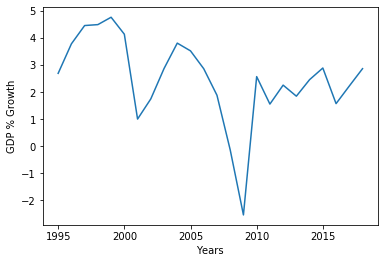

In [43]:
gdp = data["GDP % Growth"]
g= np.zeros(24)
count = 0
for x in gdp:
    g[count] = x
    count+=1

plt.plot(range(1995,2019),g)
plt.xlabel('Years')
plt.ylabel('GDP % Growth')
plt.show()

Visual Representation of the relationship between % change in GDP and each movie genre using scatter plots
Each of the following graph shows a scatter plot of GDP and each movie genre.

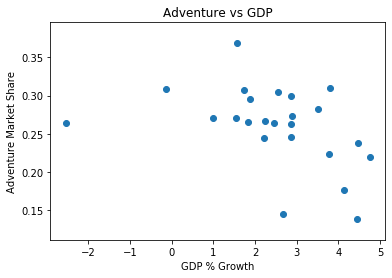

In [44]:
adventure = data['Adventure Market Share']
ad = np.zeros(24)
count = 0
for x in adventure:
    ad[count] = x
    count+=1
plt.scatter(g, ad)
plt.title('Adventure vs GDP')
plt.ylabel('Adventure Market Share')
plt.xlabel('GDP % Growth')
plt.show()

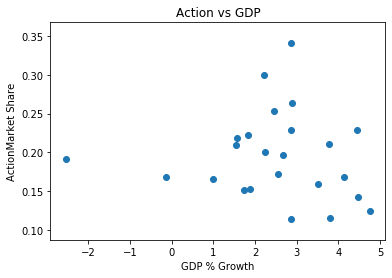

In [45]:
action = data['Action Market Share']
ac = np.zeros(24)
count = 0
for x in action:
    ac[count] = x
    count+=1
plt.scatter(g,ac)
plt.title('Action vs GDP')
plt.ylabel('ActionMarket Share')
plt.xlabel('GDP % Growth')
plt.show()

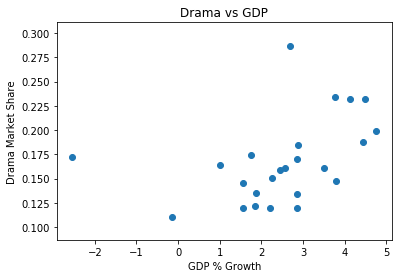

In [46]:
drama = data['Drama Market Share']
d = np.zeros(24)
count = 0
for x in drama:
    d[count] = x
    count+=1
plt.scatter(g,d)
plt.title('Drama vs GDP')
plt.ylabel('Drama Market Share')
plt.xlabel('GDP % Growth')
plt.show()

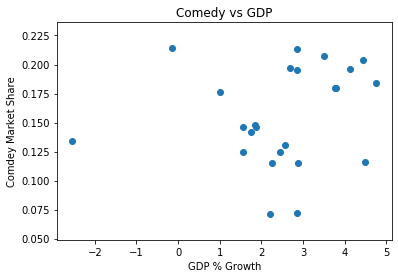

In [47]:
comedy = data['Comedy Market Share']
c = np.zeros(24)
count = 0
for x in comedy:
    c[count] = x
    count+=1
plt.scatter(g, c)
plt.title('Comedy vs GDP')
plt.ylabel('Comdey Market Share')
plt.xlabel('GDP % Growth')
plt.show()

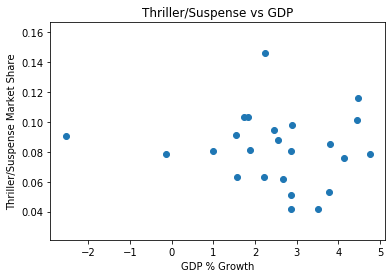

In [48]:
thriller = data['Thriller-or-Suspense Market Share']
t = np.zeros(24)
count = 0
for x in thriller:
    t[count] = x
    count+=1
plt.scatter(g,t)
plt.title('Thriller/Suspense vs GDP')
plt.ylabel('Thriller/Suspense Market Share')
plt.xlabel('GDP % Growth')
plt.show()

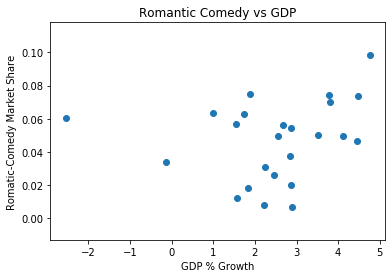

In [49]:
rom_com = data['Romantic-Comedy Market Share']
rc = np.zeros(24)
count = 0
for x in rom_com:
    rc[count] = x
    count+=1
plt.scatter(g, rc)
plt.title('Romantic Comedy vs GDP')
plt.ylabel('Romatic-Comedy Market Share')
plt.xlabel('GDP % Growth')
plt.show()

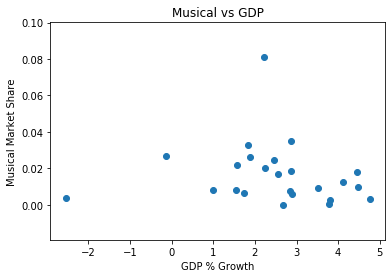

In [50]:
musical = data['Musical Market Share']
mu = np.zeros(24)
count = 0
for x in musical:
    mu[count] = x
    count+=1
plt.scatter(g, mu)
plt.title('Musical vs GDP')
plt.ylabel('Musical Market Share')
plt.xlabel('GDP % Growth')
plt.show()

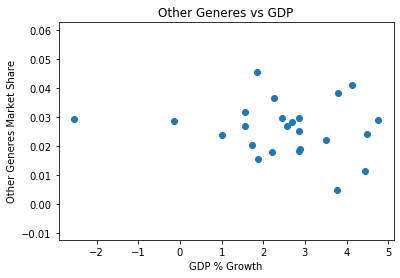

In [51]:
other = data['Other Genres Market Share']
o = np.zeros(24)
count = 0
for x in other:
    o[count] = x
    count+=1
plt.scatter(g, o)
plt.title('Other Generes vs GDP')
plt.ylabel('Other Generes Market Share')
plt.xlabel('GDP % Growth')
plt.show()

### Analysis of Plots
As you can see, all of the scatter plots show a few trends but are mainly hard to decipher because of inconsitent results. One point that is consistent is the one point in which GDP is below -2%. This outlier, although a much lower value when compared to the other gdps, may be a good way to visualize which generes do the best when the economy is doing the worst. With Romantic Comedy and Drama, one can see from the plots that there is somewhat a positive correlation between Market Share and GDP while with Adventure and Action, there seems to a negative correlation.

### Measuring the realationship between genre's Market Share with GDP by using linear regression coefficients
By running a singular regression of each genre's market share on GDP, we can determine the regression coefficient. This coefficient will predict the slope of the line of best fit when using GDP as the X axis and market share as Y axis. Basically each coefficient will predict the following: an increase of one percentage of GDP will lead a "coefficient value" increse in that genre's market share.

In [52]:
ad_model = LinearRegression().fit(data[['GDP % Growth']] ,data['Adventure Market Share'] )
ad_cor = ad_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(ad_cor), "change in Adventure Market Share")

ac_model = LinearRegression().fit(data[['GDP % Growth']],data['Action Market Share'], )
ac_coef= ac_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(ac_coef), "change in Action Market Share ")

d_model = LinearRegression().fit(data[['GDP % Growth']],data['Drama Market Share'] )
d_coef= d_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(d_coef), "change in Drama Market Share ")

c_model= LinearRegression().fit(data[['GDP % Growth']],data['Comedy Market Share'] )
c_coef= c_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(c_coef), "change in Comedy Market Share")

tr_model = LinearRegression().fit(data[['GDP % Growth']],data['Thriller-or-Suspense Market Share'] )
tr_coef= tr_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(tr_coef), "change in  Thriller/Suspense Market Share")

rc_model = LinearRegression().fit( data[['GDP % Growth']], data['Romantic-Comedy Market Share'])
rc_coef= rc_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(rc_coef), "change in Romantic-Comedy Market Share")

mu_model = LinearRegression().fit(data[['GDP % Growth']], data['Musical Market Share'] )
mu_coef= mu_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(mu_coef), "change in Musical Market Share")

o_model = LinearRegression().fit(data[['GDP % Growth']], data['Other Genres Market Share'])
o_coef= o_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(o_coef), "change in Other Genres Market Share")

A one percentage point increase in GDP leads to a -0.0138 change in Adventure Market Share
A one percentage point increase in GDP leads to a -0.0033 change in Action Market Share 
A one percentage point increase in GDP leads to a 0.0113 change in Drama Market Share 
A one percentage point increase in GDP leads to a 0.0047 change in Comedy Market Share
A one percentage point increase in GDP leads to a -0.0013 change in  Thriller/Suspense Market Share
A one percentage point increase in GDP leads to a 0.0032 change in Romantic-Comedy Market Share
A one percentage point increase in GDP leads to a -0.0012 change in Musical Market Share
A one percentage point increase in GDP leads to a -0.0008 change in Other Genres Market Share


### Analysis of coefficients
From the above values, a singular regression predicts that Adventure and Action have a negative slope/correlation to GDP and that Drama and Romantic-Comedy are predicted to have a positive slope/correlation to GDP. This is similar to what was predicted using the visuals of the scatter plots. However, the regressions also predicts that Comedy is postively correlated to GDP and that Thriller/Suspense, Musical, and other Genres are negatively correlated to GDP. These are values that are not so obvious when looking at the visuals.

### Measuring the relationship between Genre's Market Share with GDP using linear and possible non linear correlation values
Regression is not the only way and may not be the best way to show the possible correlation between two variables. Correlation Coefficient is a value that normalizes the covariance of two variables and shows the linear correlation they have (values between [-1,1]. A pearson correlation will use the ranks of values and measure the possible non-linear correlation between the two of them. IF there is a linear correlation, the two values should be similar and if there is more of a non linear correlation, the absolute value of the pearson correlation will be larger.

In [53]:
ad_cor = np.corrcoef( data['GDP % Growth'],data['Adventure Market Share'])[0][1]
ad_sp = spearmanr(data['GDP % Growth'],data['Adventure Market Share'])
print("Correlation Coefficient between Adventure and GDP: {:.4f}".format(ad_cor))
print('Spearman r of Adventure and GDP: {:.4f}'.format(ad_sp.correlation))

ac_cor = np.corrcoef(data['GDP % Growth'],data['Action Market Share'])[0][1]
ac_sp = spearmanr(data['GDP % Growth'],data['Action Market Share'])
print("Correlation Coefficient between Action and GDP: {:.4f}".format(ac_cor))
print('Spearman r of Action and GDP: {:.4f}'.format(ac_sp.correlation))

d_cor = np.corrcoef(data['GDP % Growth'],data['Drama Market Share'])[0][1]
d_sp = spearmanr(data['GDP % Growth'],data['Drama Market Share'])
print("Correlation Coefficient between Drama and GDP: {:.4f}".format(d_cor))
print('Spearman r of Drama and GDP: {:.4f}'.format(d_sp.correlation))

c_cor = np.corrcoef(data['GDP % Growth'],data['Comedy Market Share'])[0][1]
c_sp = spearmanr(data['GDP % Growth'],data['Comedy Market Share'])
print("Correlation Coefficient between Comedy and GDP: {:.4f}".format(c_cor))
print('Spearman r of Comedy and GDP: {:.4f}'.format(c_sp.correlation))

tr_cor = np.corrcoef(data['GDP % Growth'],data['Thriller-or-Suspense Market Share'])[0][1]
tr_sp = spearmanr(data['GDP % Growth'],data['Thriller-or-Suspense Market Share'])
print("Correlation Coefficient between Thriller and GDP: {:.4f}".format(tr_cor))
print('Spearman r of Thriller and GDP: {:.4f}'.format(tr_sp.correlation))

rc_cor = np.corrcoef(data['GDP % Growth'], data['Romantic-Comedy Market Share'])[0][1]
rc_sp = spearmanr(data['GDP % Growth'],data['Romantic-Comedy Market Share'])
print("Correlation Coefficient between Romantic-Comedy and GDP: {:.4f}".format(rc_cor))
print('Spearman r of Romantic-Comedy and GDP: {:.4f}'.format(rc_sp.correlation))

mu_cor = np.corrcoef(data['GDP % Growth'],data['Musical Market Share'])[0][1]
mu_sp = spearmanr(data['GDP % Growth'],data['Musical Market Share'])
print("Correlation Coefficient between Musical and GDP: {:.4f}".format(mu_cor))
print('Spearman r of Musical and GDP: {:.4f}'.format(mu_sp.correlation))

o_cor = np.corrcoef(data['GDP % Growth'],data['Other Genres Market Share'])[0][1]
o_sp = spearmanr(data['GDP % Growth'],data['Other Genres Market Share'])
print("Correlation Coefficient between Other Genres and GDP: {:.4f}".format(o_cor))
print('Spearman r of Other Genresand GDP: {:.4f}'.format(o_sp.correlation))

Correlation Coefficient between Adventure and GDP: -0.4179
Spearman r of Adventure and GDP: -0.4905
Correlation Coefficient between Action and GDP: -0.0941
Spearman r of Action and GDP: -0.1257
Correlation Coefficient between Drama and GDP: 0.4085
Spearman r of Drama and GDP: 0.5224
Correlation Coefficient between Comedy and GDP: 0.1769
Spearman r of Comedy and GDP: 0.1967
Correlation Coefficient between Thriller and GDP: -0.0854
Spearman r of Thriller and GDP: -0.1409
Correlation Coefficient between Romantic-Comedy and GDP: 0.2144
Spearman r of Romantic-Comedy and GDP: 0.2130
Correlation Coefficient between Musical and GDP: -0.1147
Spearman r of Musical and GDP: -0.2857
Correlation Coefficient between Other Genres and GDP: -0.1465
Spearman r of Other Genresand GDP: -0.1235


### Analysis
From the correlation Coefficient and Spearman Correlation data, most of the genres have a more non-linear than linear realtionship with GDP. However, only two genres, Adventure and Drama, have an absolute value of spearman correlation higher than 0.5. This means that for a majority of the genres, although there there is more of a non-linear relationship than linear, there is little correlation between the two variables. This means that an increase or decrease in the market share of those genres does not lead to an increase or decrease in GDP. The change in GDP is more than likely randomly correlated to those genres and their relationship is mostly random. However, for Adventure and Drama there is more of an correlation which is non linear for both genres. The Spearman value is closer to an absolute value of 1 for both genres than their correlation coefficient values. This shows that there is a more non linear realtionship between the genres' market share and the GDP. As market share for Adventure increases, there is usually some sort of non linear decrease in GDP. As market share for Drama increases, there is usally some sort of non linear increase in GDP. This all boils down to this: Based off the correlations between Adventure and Drama with GDP, when the economy is doing well, Drama movies are made more and do better than usual. When the economy is doing poorly, Adventure movies are made more and do better than usual.

Testing the significance of the correlations and regression models
Using random permutations of each genere's market share, we can test to see if the correlations and coefficients genereated by regression models and spearman calculation actually show that, with a large number of samples, the certain genres and GDP are correlated. This will mainly be a test for the genres of Adventrue and Drama as they had much higher correlation values than all other genres. There seems to be little correlation for the other 6 genres so we will not test them. Also, we will use n = 1000 to ensure that there are enough random samples.

In [54]:
def permutated_y(x):
    return np.random.permutation(x.copy())

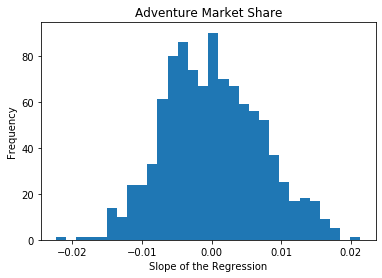

The mean of the permutated regressions is 0.000209
The variance of the permutated regressions is 0.000048


In [55]:
slope_ad = np.zeros(1000)
count = 0 
for x in slope_ad:
    p = permutated_y(data['Adventure Market Share'])
    c = LinearRegression().fit(data[['GDP % Growth']], p)
    num = c.coef_[0]
    slope_ad[count] = num
    count = count + 1
    
plt.hist(slope_ad, bins = 30)
plt.title("Adventure Market Share")
plt.xlabel("Slope of the Regression")
plt.ylabel("Frequency")
plt.show()
mean_ad = np.mean(slope_ad)
var_ad = np.var(slope_ad)
print("The mean of the permutated regressions is {:.6f}".format(mean_ad))
print("The variance of the permutated regressions is {:6f}".format(var_ad))

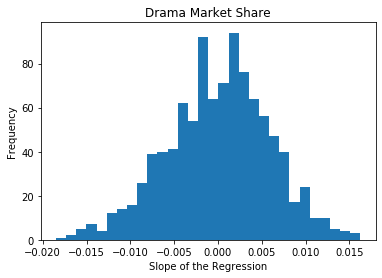

The mean of the permutated regressions is 0.000077
The variance of the permutated regressions is 0.000035


In [56]:
slope_d = np.zeros(1000)
count = 0 
for x in slope_d:
    p = permutated_y(data['Drama Market Share'])
    c = LinearRegression().fit(data[['GDP % Growth']], p)
    num = c.coef_[0]
    slope_d[count] = num
    count = count + 1
    
plt.hist(slope_d, bins = 30)
plt.title("Drama Market Share")
plt.xlabel("Slope of the Regression")
plt.ylabel("Frequency")
plt.show()
mean_d = np.mean(slope_d)
var_d = np.var(slope_d)
print("The mean of the permutated regressions is {:.6f}".format(mean_d))
print("The variance of the permutated regressions is {:.6f}".format(var_d))

# Income and Market

In this portion of the analysis, we will be taking a look at whether income impacts the market share a genre captures. We will specifically be looking at the change in annual perecent change in income to elminate any noise associated with a general increase in percentage income. The reason we look at the change in % change is to eliminate the discrepancies associated with general trends in changing income levels.

### Line of Best Fit and Scatter Plot
We can first begin by visually attempting to identify any relationship between the two variables. To do so, we can create a scatterplot and a line of best fit.

In [57]:
income = data.columns[-1]

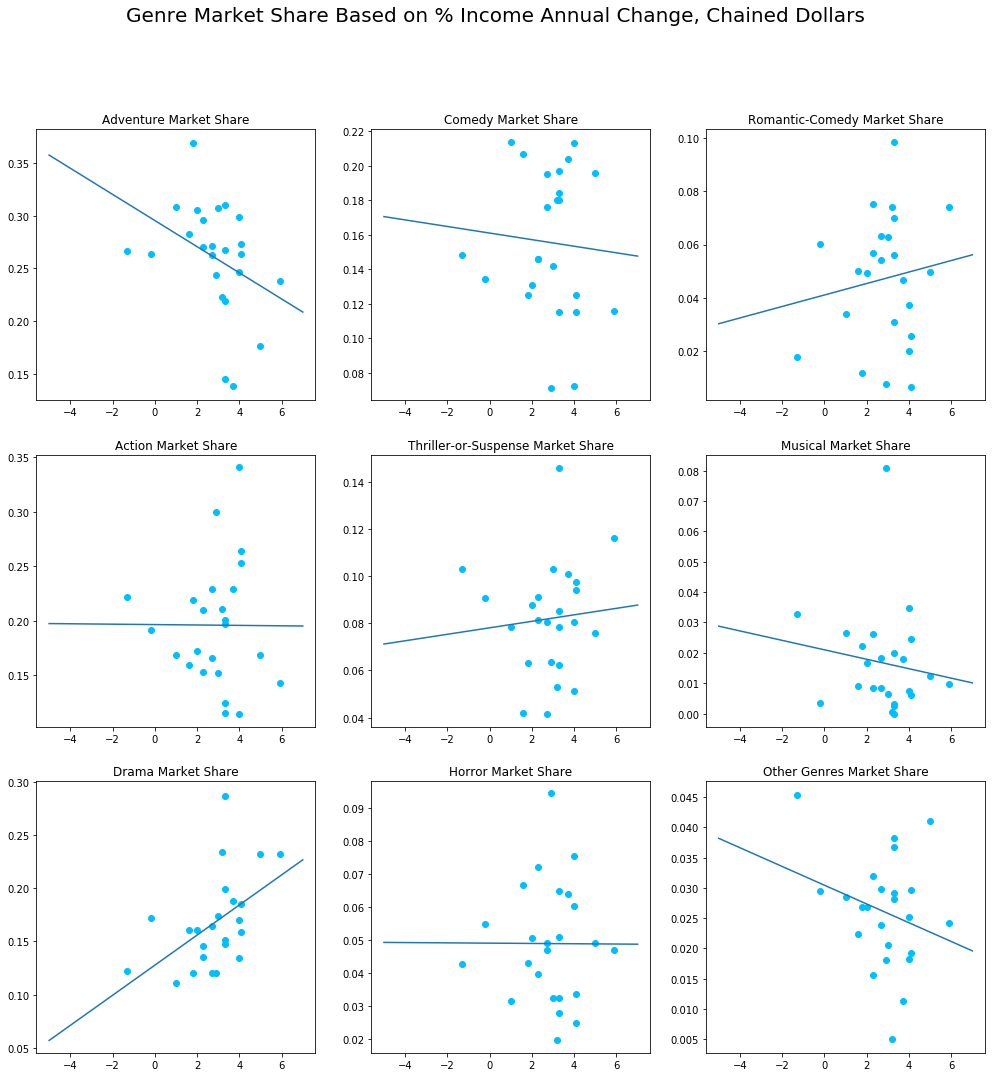

In [58]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[income], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()


From the graphs above, we can see that many of the genres do not have a relationship with income. When we look at the graph for Action, for example, the line of best fit remains relatively the same, while the action market share is scattered along the y-axis. Therefore, there is clearly not a relationship between them. However, certain graphs demonstrate a potential trend between the genre and market share. To better verify strengths of the relationships, we can look at both residual values and the coefficient of determination.

### Residuals StDev
Observation: The standard deviation of the residuals calculated below show a variation ranging from 1.315 to 1.519. This means that the distribution is not that far from the line of best fit.

In [59]:
for c in col:
    x=data[income]
    mean_x=x.mean()
    y=data[c]
    mean_y=y.mean()
    n=len(data[income])
    slope = np.sum((x - mean_x) * (y - mean_y)) / np.sum((y - mean_y)**2)
    intercept = mean_x - slope * mean_y
    predicted_x = y * slope + intercept
    residuals = x - predicted_x
    residual_std = np.sqrt(np.sum((residuals - residuals.mean())**2) / n)
    print(c)
    print('{:.3f}'.format(residual_std))

Adventure Market Share
1.414
Action Market Share
1.519
Drama Market Share
1.315
Comedy Market Share
1.515
Thriller-or-Suspense Market Share
1.513
Horror Market Share
1.519
Romantic-Comedy Market Share
1.504
Musical Market Share
1.503
Other Genres Market Share
1.466


### Finding r
First, we calculated the r-value of the relationships. From a quick glance, we can see that most relationships have an absolute value of below 0.1.

In [60]:
rvalues=[]
for c in col:
    r= np.corrcoef(data[income], data[c])[0][1]
    rvalues.append(r)
    print(c, ':', '{:.3f}'.format(r))

Adventure Market Share : -0.365
Action Market Share : -0.005
Drama Market Share : 0.500
Comedy Market Share : -0.070
Thriller-or-Suspense Market Share : 0.089
Horror Market Share : -0.004
Romantic-Comedy Market Share : 0.139
Musical Market Share : -0.142
Other Genres Market Share : -0.261


We then filtered out the data for any relationships with an absolute value greater than 0.3. From there, we can conclude that only Adventure and Drama show a relationship with income.

In [61]:
relationship=[]
for i in range(len(col)):
    if abs(rvalues[i])>0.3:
        relationship.append(col[i])
        print(col[i], rvalues[i])

Adventure Market Share -0.36537483796814235
Drama Market Share 0.49976989083829354


### Testing Randomness
We have identified that Adventure and Drama show a relationship with income, but now we need to identify whether this relationshp is due to chance. To do so, we permuted the genre data to see whether a slope like the one above could have been due to chance, and found that it could, in fact, be due to chance.

In [62]:
# permutation of data for a given genre c
def permuted_y(c):
    return np.random.permutation(data[c].copy())

def findtheslope(x,c):
    #creates a dataframe with a permutated y and returns the slope 
    #purpose: ensure that ny, ndf, and nmodel are local variable that can be rewritten with each function call
    ny=permuted_y(c)
    ndf=pd.DataFrame({'ny':ny})
    nmodel=LinearRegression().fit(x,ndf[['ny']])
    return nmodel.coef_[0][0]

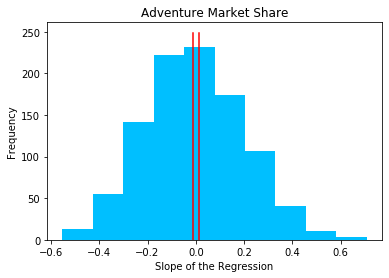

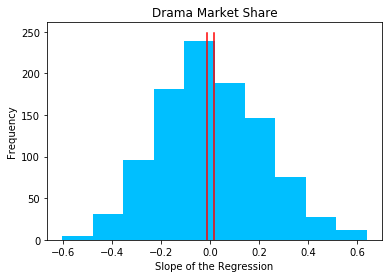

In [63]:
xaxs = 0
yaxs = 0
trials=1000


for c in relationship:  
    newarray = np.zeros(trials)
    for i in range(len(newarray)):
        newarray[i]=findtheslope(data[[c]],c)
    
    #Trying to find the value of the slope
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    y = list(range(0, 250))
    x = np.full((1,250),score)[0]
    plt.plot(x, y, 'r')
    
    y = list(range(0, 250))
    x = np.full((1,250),(-1*score))[0]
    plt.plot(x, y, 'r')
    
    plt.hist(newarray, color = 'deepskyblue')
    plt.title(c)
    plt.xlabel('Slope of the Regression')
    plt.ylabel('Frequency')
    plt.show()

### Spearman Correlation and P-Value
Although a linear relationship slope could be due to chance, we could also look at a Spearman correlation and identify the strength of the correlation and the associated p-value.

In [64]:
rv=[]
thepvalue =[]
for c in col:    
    nr = spearmanr(data[income],data[c])
    cor= nr.correlation
    pv=nr.pvalue
    rv.append(cor)
    thepvalue.append(pv)
    print(c)
    print('r:', '{:.3f}'.format(cor), 'p:', '{:.3f}'.format(pv))

Adventure Market Share
r: -0.439 p: 0.032
Action Market Share
r: 0.011 p: 0.959
Drama Market Share
r: 0.526 p: 0.008
Comedy Market Share
r: -0.143 p: 0.505
Thriller-or-Suspense Market Share
r: 0.151 p: 0.483
Horror Market Share
r: -0.037 p: 0.865
Romantic-Comedy Market Share
r: -0.016 p: 0.940
Musical Market Share
r: -0.186 p: 0.385
Other Genres Market Share
r: -0.117 p: 0.587


We filtered the data based on a Spearman correlation greater than 0.3 and found that both the adventure and drama market do so. We then looked at the p-value to determine the validity of this relationship. Both adventure and drama have a p-value of less than 5%, so we can reject the null hypothesis that this correlation is due to chance.

In [65]:
for i in range(len(col)):
    if abs(rv[i])>.3:
        print(col[i])
        print('r:','{:.3f}'.format(rv[i]),'p:','{:.3f}'.format(thepvalue[i]))

Adventure Market Share
r: -0.439 p: 0.032
Drama Market Share
r: 0.526 p: 0.008


# Conclusion
From the analysis above, we have found that a linear relationship is weak and possibly due to chance for all genres. However, a moderate, non-linear correlation does exist for two genres: Adventure and Drama. Based on the p-values, it is likely that such a correlation is not due to chance. Therefore, we could obser